In [1]:
import pandas as pd

#df = pd.read_pickle('https://pandora.infn.it/public/aacc34/dl/dataset_pol_vbs_full2018v9.pkl')
df = pd.read_pickle('https://pandora.infn.it/public/ace7be/dl/dataset_pol_vbs_full2018v9_noWW.pkl')
#df = pd.read_pickle('https://pandora.infn.it/public/01a234/dl/dataset_pol_vbs_full2018v9_VBSvsTop.pkl')
pd.set_option('display.max_columns', None)
#df = df.drop(columns=['nlep', 'njet'])
df = df.drop(columns=['costhetastarcmww_l1', 'costhetastarcmww_l2', 'nlep', 'njet'])
df.dropna(inplace=True)
df

,Rpt,Zepp_l1,Zepp_l2,Zepp_ll,detajj,eta_j1,eta_j2,eta_l1,eta_l2,mjj,mll,phi_j1,phi_j2,phi_l1,phi_l2,pt_j1,pt_j2,pt_l1,pt_l2,ptll,ptmiss,isLL,isMIX,isTT,isBKG
26661,0.071109,0.752106,-1.085083,0.166489,4.372803,1.574951,-2.797852,0.140656,-1.696533,1132.395874,74.504433,2.715332,-0.585083,-0.174683,0.556152,179.416260,87.916542,40.785088,27.501404,63.954254,46.535076,1.0,0.0,0.0,0.0
24981,1.546000,1.294922,0.506470,0.900696,6.203613,3.100586,-3.103027,1.293701,0.505249,3000.439453,362.475891,2.166504,1.609863,-0.855591,2.323730,287.982422,63.421875,210.527161,134.124008,76.665703,248.657608,1.0,0.0,0.0,0.0
12843,0.085294,0.454163,0.889832,0.671997,4.000854,-3.425781,0.575073,-0.971191,-0.535522,1197.721313,91.825661,0.462097,-2.017578,1.261230,-2.422852,175.262268,144.419876,58.571838,36.858910,33.035931,78.273270,1.0,0.0,0.0,0.0
39497,0.289664,0.543030,-0.204224,0.169403,3.624512,-2.529297,1.095215,-0.174011,-0.921265,546.365417,95.665878,2.334961,-0.038239,-1.401123,2.425781,130.533966,58.559639,94.638802,23.396324,77.944382,36.399990,1.0,0.0,0.0,0.0
5196,0.158641,-1.378052,1.872192,0.247070,4.374268,-2.825195,1.549072,-2.016113,1.234131,947.352173,207.611618,2.879883,-0.021069,-0.549927,-1.480469,115.368050,95.576279,55.339760,31.609285,78.432381,62.488613,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919678,0.783231,1.644897,0.289062,0.966980,3.795654,2.405762,-1.389893,2.152832,0.796997,408.815674,128.845047,-0.934448,-1.213623,-3.106445,0.911133,66.468246,58.853916,77.122635,39.728088,60.024273,39.313660,0.0,0.0,0.0,1.0
360159,0.203385,-0.640808,-2.314575,1.477692,2.639404,2.224609,-0.414795,0.264099,-1.409668,398.150574,105.658821,-2.780273,1.364502,1.459961,-0.017944,126.288994,81.480728,53.711788,38.964512,69.220268,102.770149,0.0,0.0,0.0,1.0
562518,0.179343,-1.712891,2.426514,0.356812,3.503418,1.806152,-1.697266,-1.658447,2.480957,501.154633,280.888672,0.355835,2.836426,-2.266602,-2.926270,147.905258,48.600594,62.703651,20.559729,79.949005,28.307400,0.0,0.0,0.0,1.0
1337546,0.465803,1.836578,0.160156,0.998367,4.622559,0.293457,-4.329102,-0.181244,-1.857666,704.340454,114.971146,0.539795,-0.993774,2.451660,0.719238,70.783577,68.469261,74.151932,30.444410,75.490402,81.172012,0.0,0.0,0.0,1.0


In [2]:
nclasses = 4
for col in df.columns[(len(df.columns) - nclasses):len(df.columns)]:
    print (col, len(df[df[col]==1]))

isLL 40000
isMIX 40000
isTT 40000
isBKG 40000


In [3]:
import tensorflow as tf
# import optuna
import tqdm
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Activation, Dense, Dropout, InputLayer
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import initializers
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle
import copy
print(tf.__version__)
from tensorflow.python.client import device_lib
tf.config.run_functions_eagerly(True)

2.7.0-rc1


In [4]:
class SimpleNeuralNetwork ( tf.Module ):
    def __init__ (self, nEpochs, learning_rate, N_NODES, n_layers, n_features, n_outputsC=nclasses):
        self.learning_rate = learning_rate
        self.optimizer  = tf.optimizers.Adam (self.learning_rate)
        self.nEpochs = nEpochs
        self.N_NODES = N_NODES
        self.n_layers = n_layers
        self.n_features = n_features
        self.n_outputsC = n_outputsC
        self.weights = self.build (self.n_features, self.N_NODES)
        
                                
    # Define the structure of the model
    def build (self, n_input, N_NODES):
        # initializer = initializers.Ones()

        # Classifier model
        self.model1 = Sequential()
        self.model1.add(Dense (self.N_NODES, activation = 'relu', input_dim  = n_input))
        for i in range(self.n_layers):
            self.model1.add(Dense (self.N_NODES, activation = 'relu'))
        self.model1.add(Dense (self.n_outputsC, activation = 'softmax',input_dim = self.N_NODES))      
        
        return self.model1.weights
     
    # Performs the epochs loop and the actual training.
    # Monitors the training and validation loss functions, both for the classifier and the adversary.
    # Returns the classifier categorical accuracy.
    def fit (self, X, Y, X_val, Y_val, show_loss = False):
        losses = []
        losses_val = []

        self.means = np.mean ( X, axis = 0)
        self.sigmas = np.std ( X, axis = 0)

        for iEpoch in tqdm.tqdm(range(self.nEpochs)):
                l, l_val = self._train (X, Y, X_val, Y_val)
                losses.append ( l )
                losses_val.append ( l_val )

        losses = np.array(losses)               
        losses_val = np.array(losses_val)
               
        plt.plot (losses, color = "c", label='Training set')
        plt.plot (losses_val, color ='tab:blue', label = "Validation set")
        plt.xlabel ("Epoch"); plt.ylabel ("Loss")
        plt.legend(frameon=False)
        plt.show()
        
        ca = tf.keras.metrics.CategoricalAccuracy()
        ca.update_state(Y, self.predict_proba(X))
        
        return ca.result().numpy()

    def save_weights(self, model_name):
        self.model1.save_weights(model_name+'_weights_1')
    
    def load_weights(self, model_name):
        self.model1.load_weights(model_name+'_weights_1')
        
    def save_model(self, model_name):
        self.model1.save("saved_models/"+model_name+"_1")

    def reset_optimizers(self):
        self.optimizer  = tf.optimizers.Adam (self.learning_rate)
        
    def set_epochs(self, epochs):
        self.nEpochs = epochs
        
    # Applies a pre-processing to the input features and returns the classifier representation.
    #@tf.function
    def predict_proba (self, X):
        ppX = (X - self.means)/self.sigmas
        return  tf.clip_by_value ( self.model1 (ppX) , 1e-7, 1. - 1e-7 )


    @tf.function
    def _train (self, X, Y, X_val, Y_val):
        Y_true = tf.cast (Y, tf.float32)
        Y_true_val = tf.cast (Y_val, tf.float32)

        with tf.GradientTape() as gt:
            #gt.watch ( self.weightsC )
            Y_hat = self.predict_proba (X)
            Y_hat_val = self.predict_proba (X_val) #N3(N1(x)) validation set
            
            ## Training set
            # Use the categorical cross-entropy as loss function for the classifier
            cce = tf.keras.losses.CategoricalCrossentropy()
            loss = tf.reduce_mean ( cce( Y_true, Y_hat ) )
            
            ## Validation set
            cce_val = tf.keras.losses.CategoricalCrossentropy()
            loss_val = tf.reduce_mean (cce_val( Y_true_val, Y_hat_val ) )
            
            # Compute the gradient of the overall loss with respect to the classifier weights
            gradients = gt.gradient ( loss, self.weights )

        # Apply the gradients
        self.optimizer.apply_gradients ( zip(gradients, self.weights) )
        
        return loss, loss_val

In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 150

features = df.columns[:len(df.columns)-nclasses]

NDIM = len(features)

for col in df.columns:
    df[col] = np.hstack(df[col])
'''
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
'''
df = shuffle(df)

# Perform the splitting and define training and validation datasets
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_val = df[~msk]

X = df_train.values[:,0:NDIM]
Y = df_train.values[:,NDIM:NDIM+nclasses] # isLL, isMIX, isTT, isBKG

X_val = df_val.values[:,0:NDIM]
Y_val = df_val.values[:,NDIM:NDIM+nclasses] # isLL, isMIX, isTT, isBKG

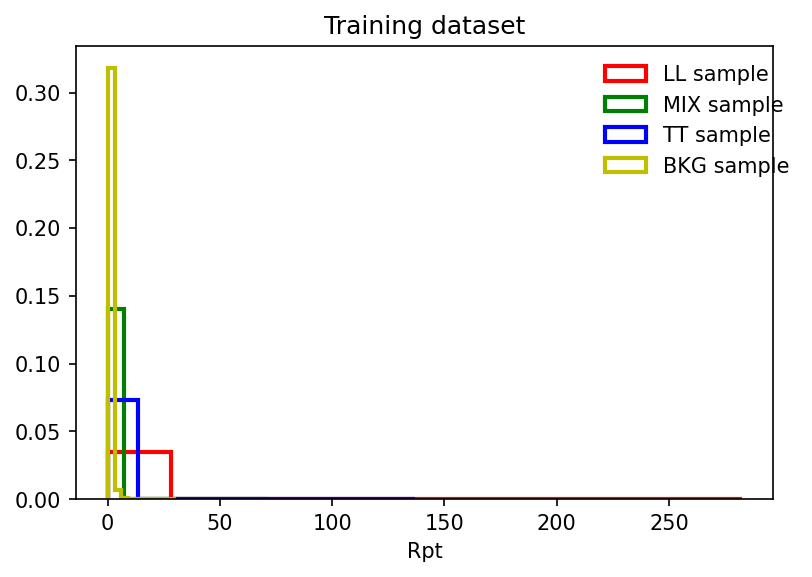

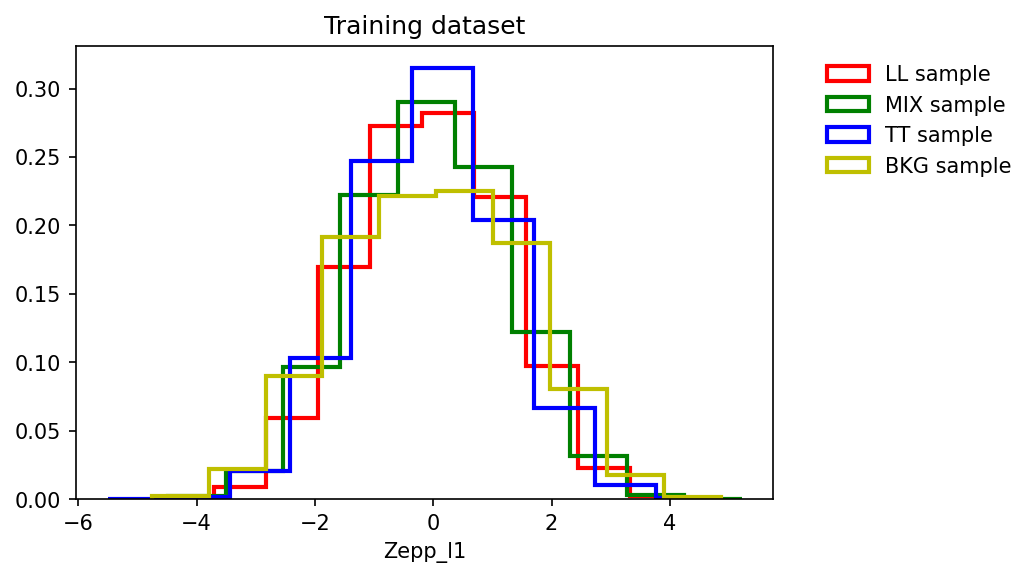

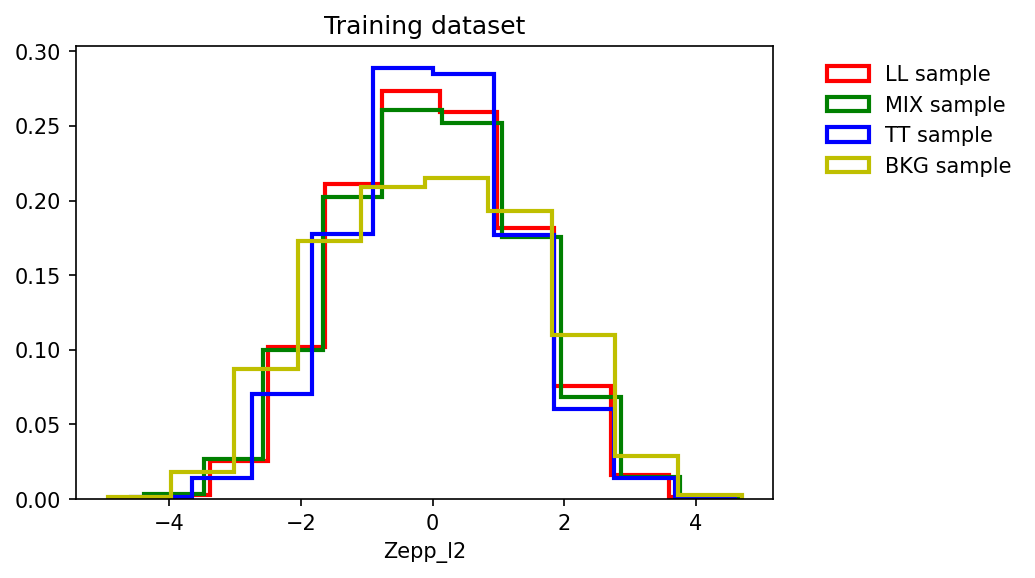

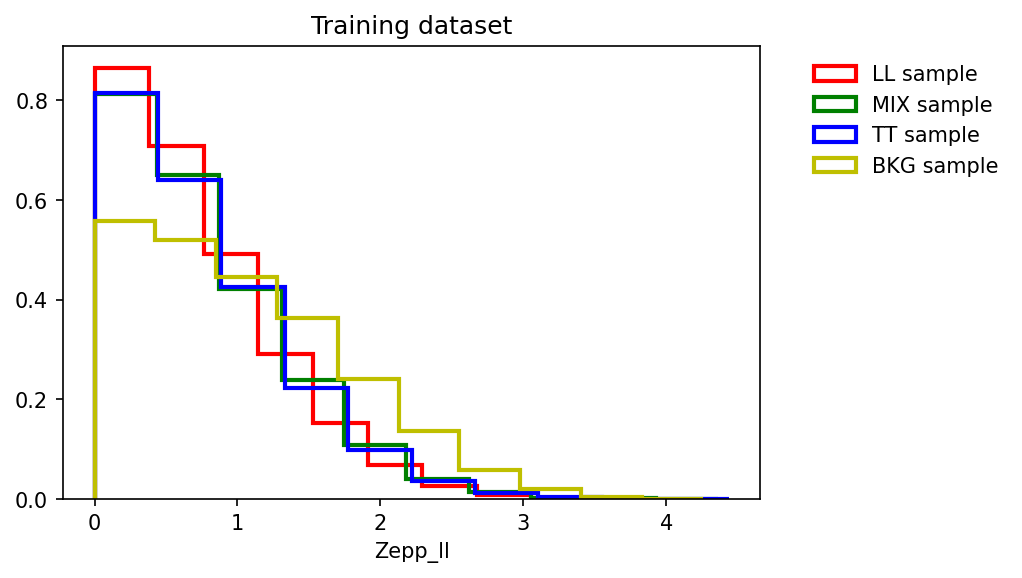

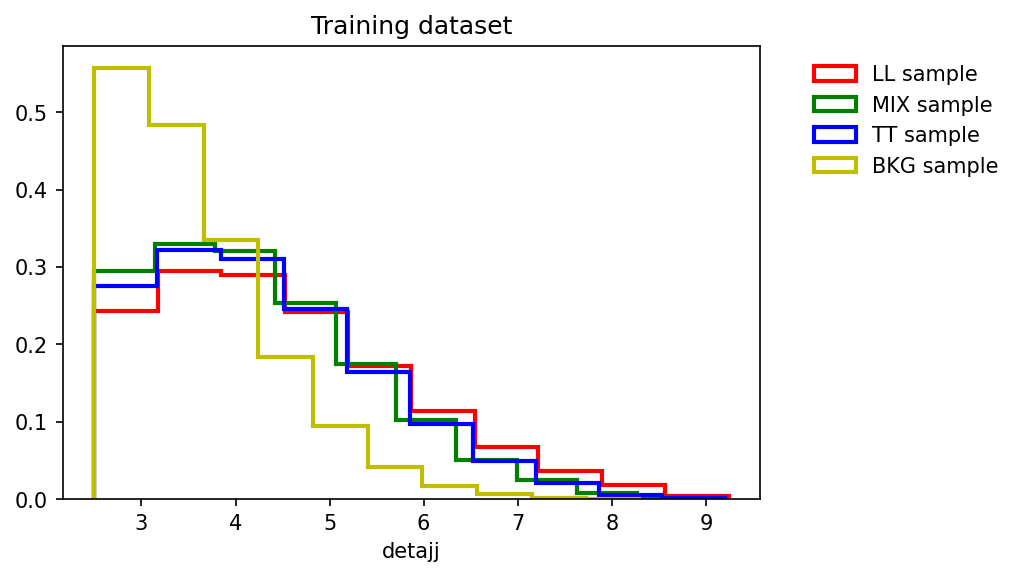

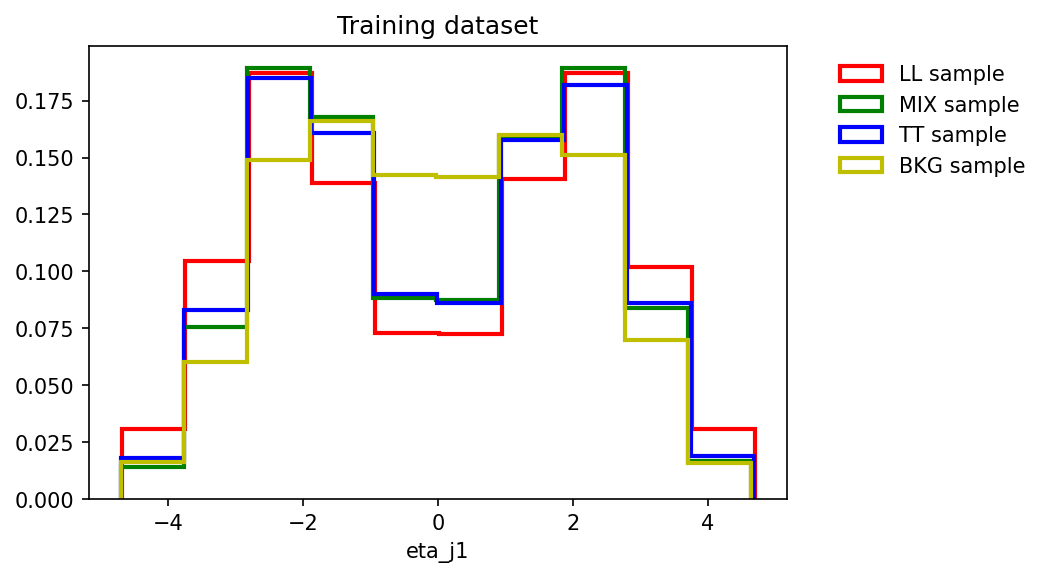

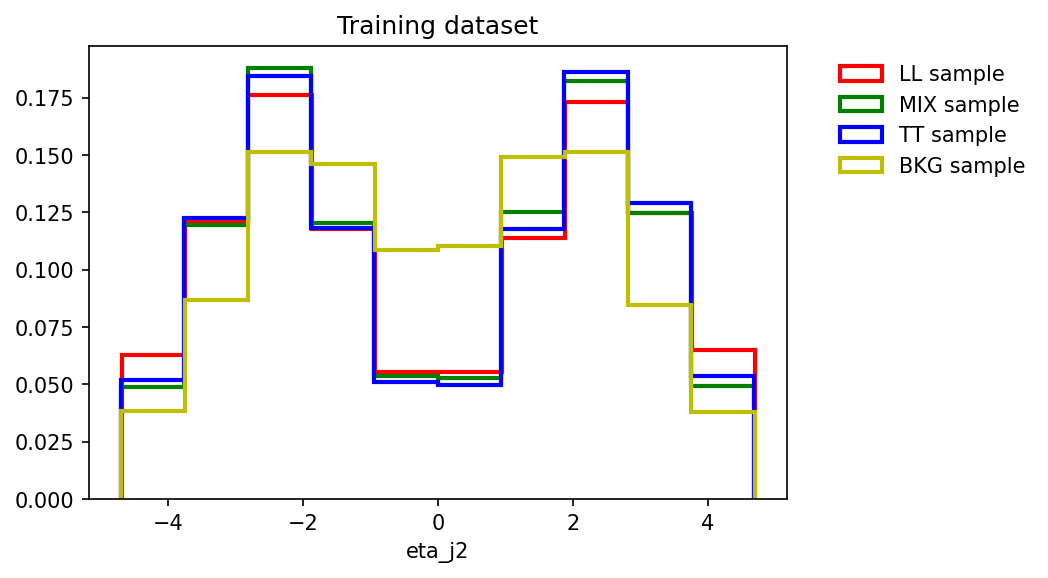

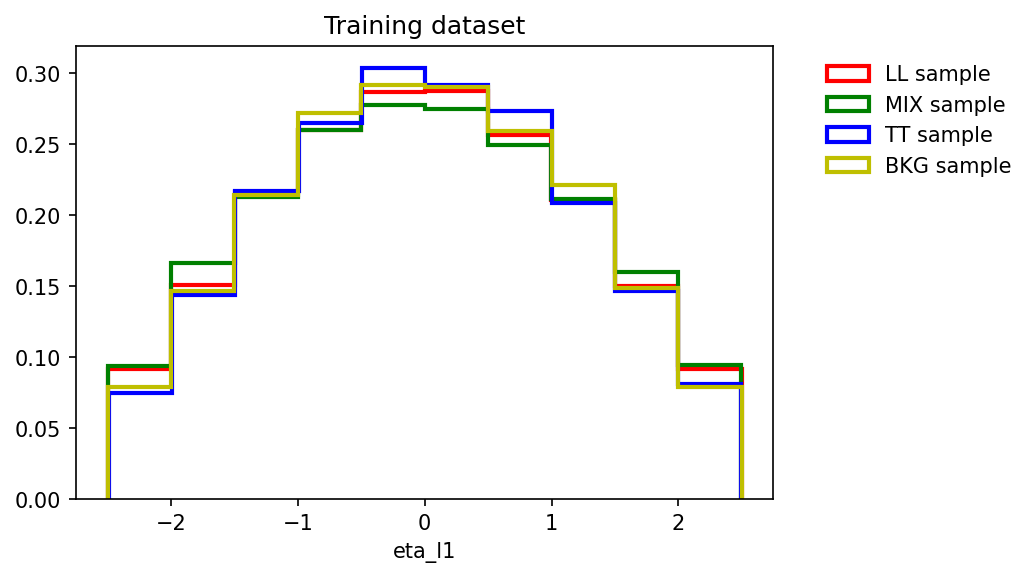

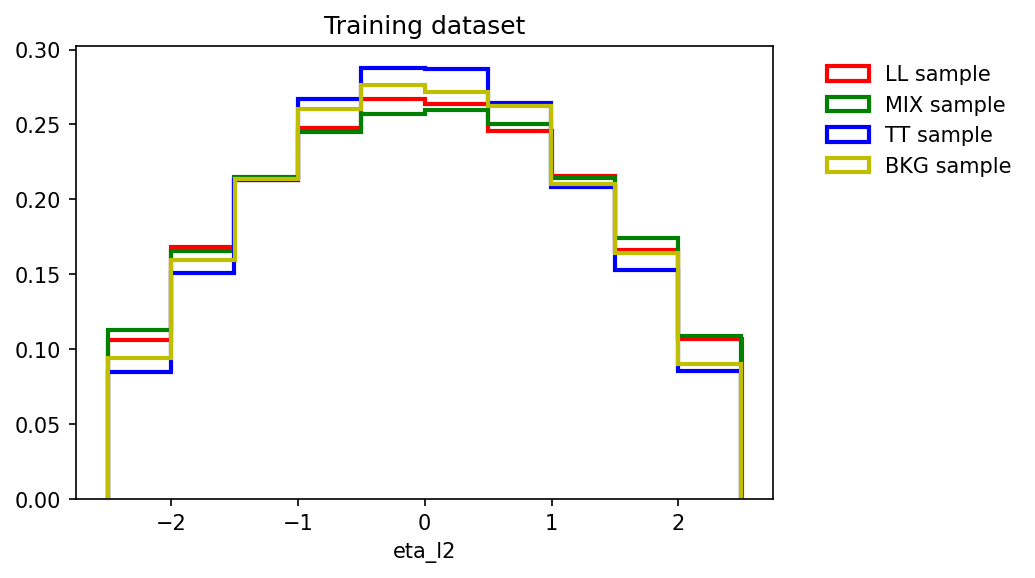

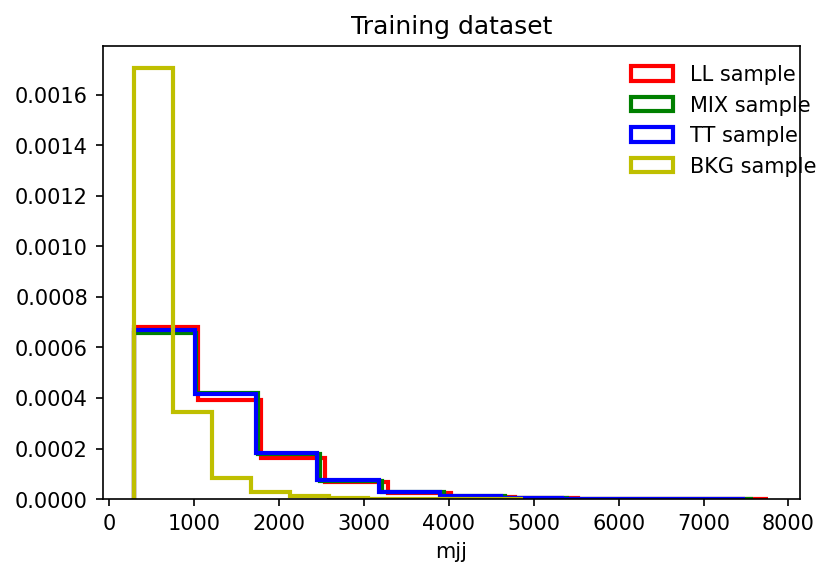

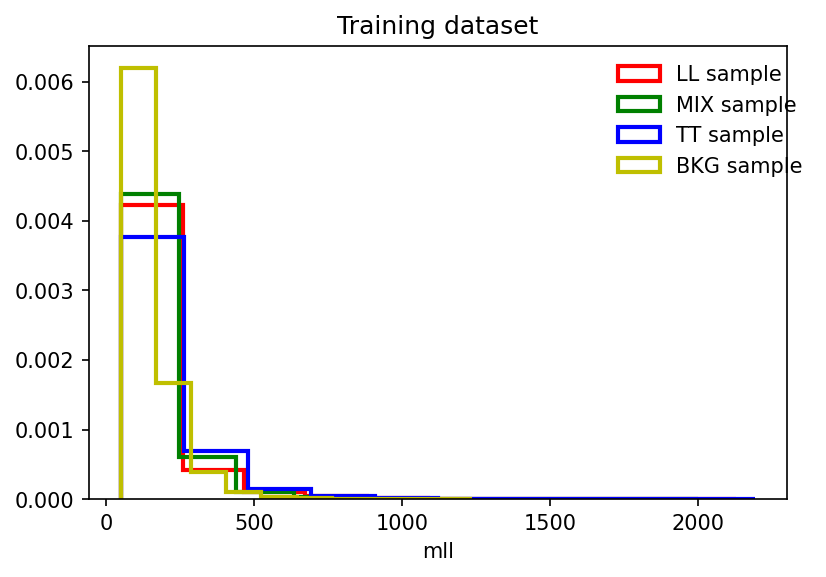

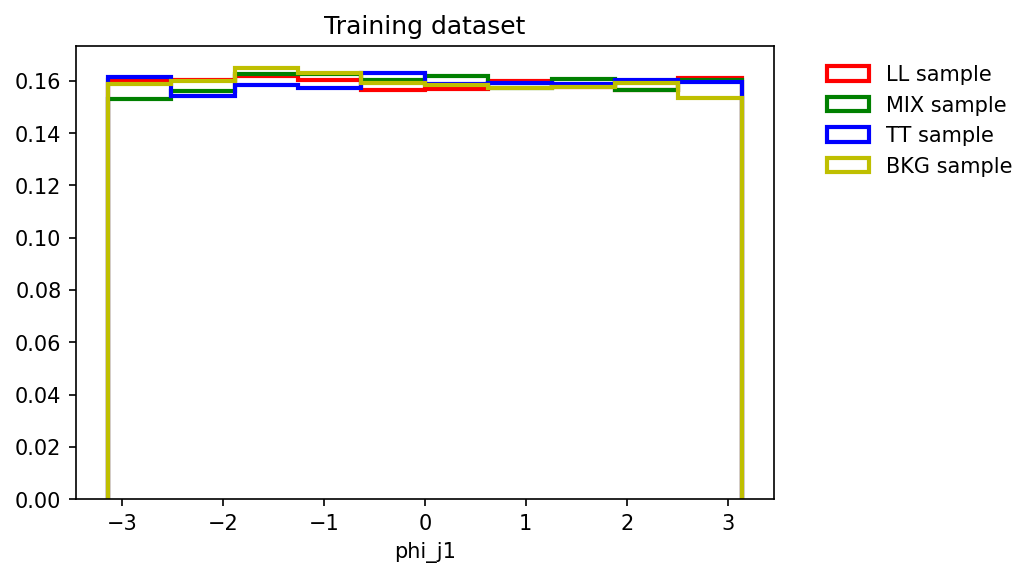

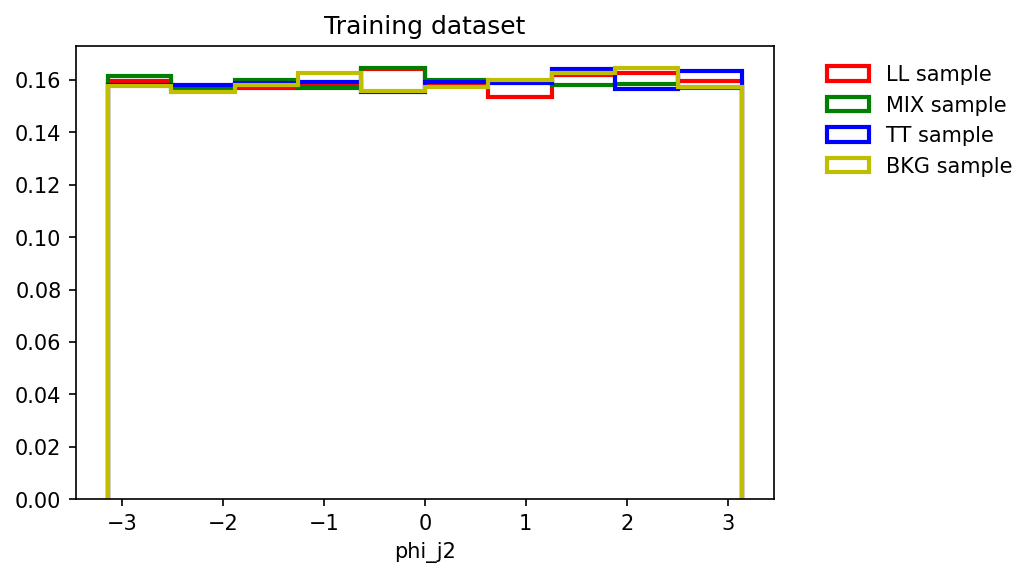

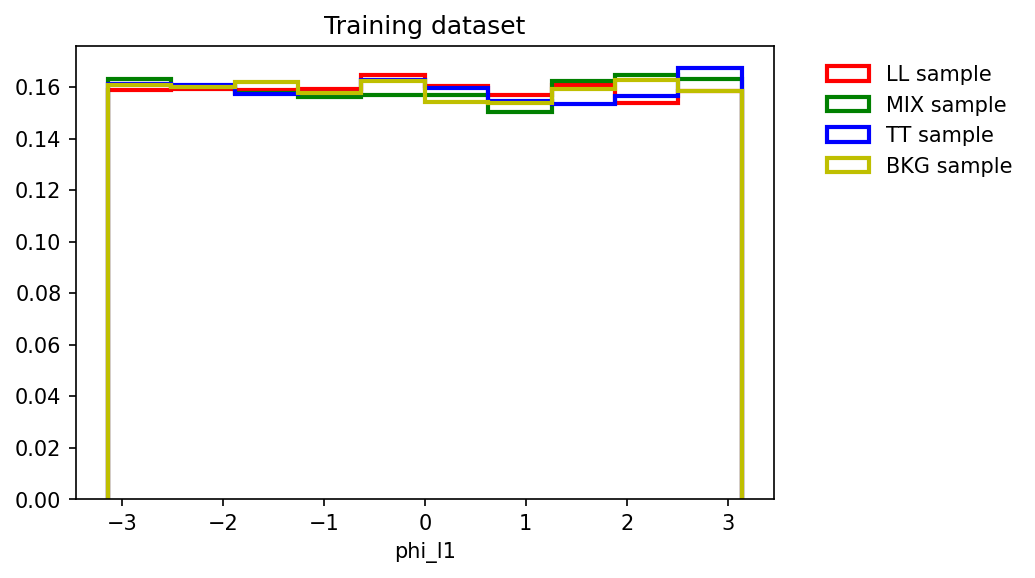

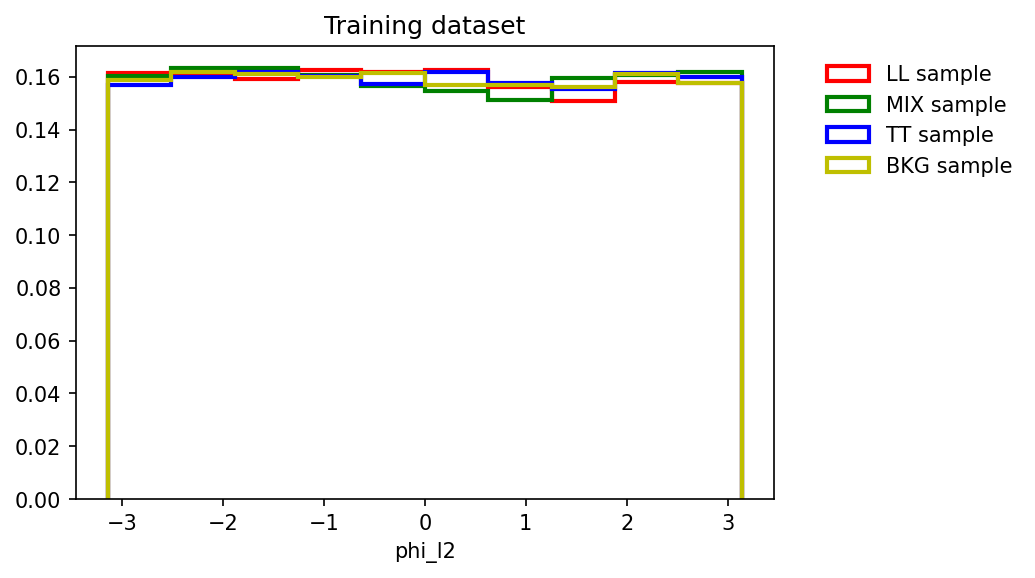

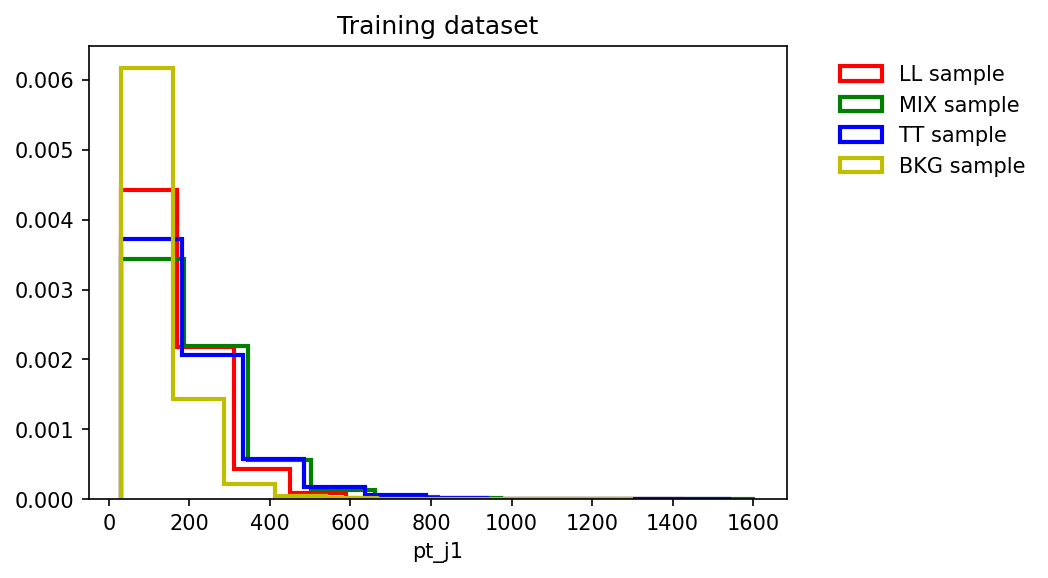

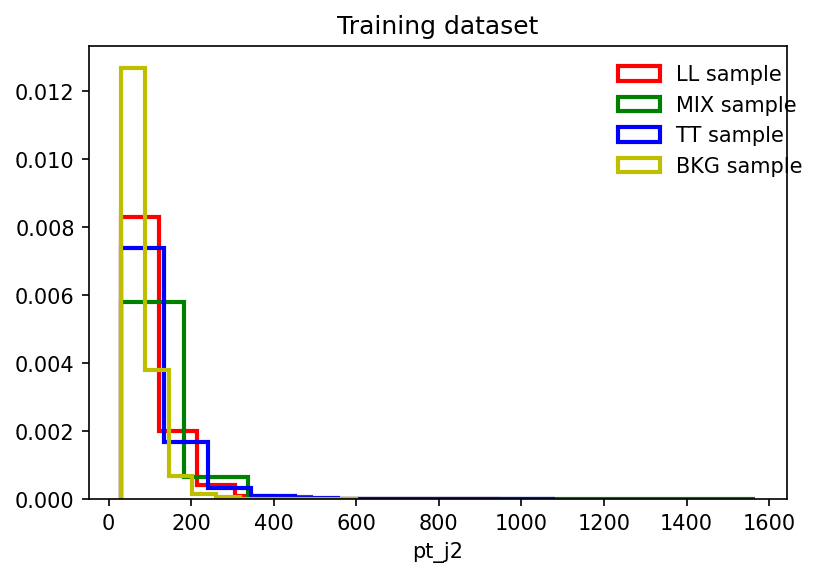

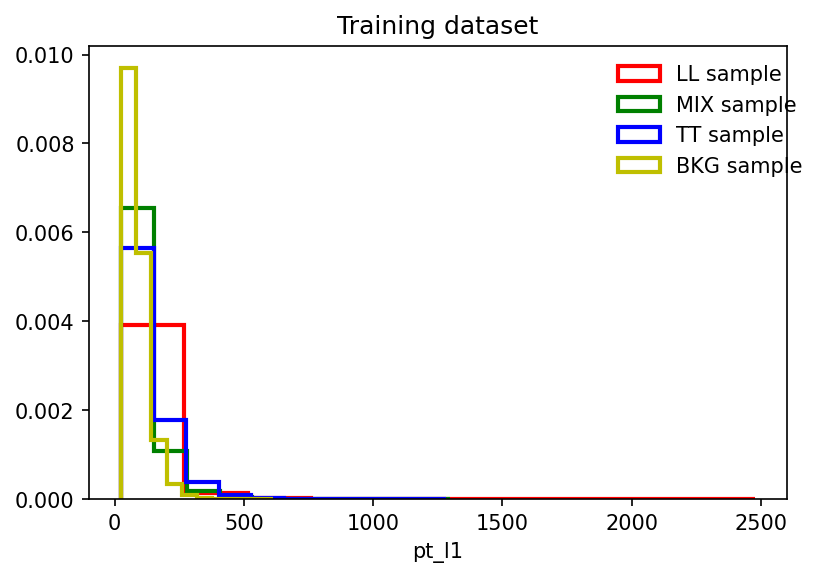

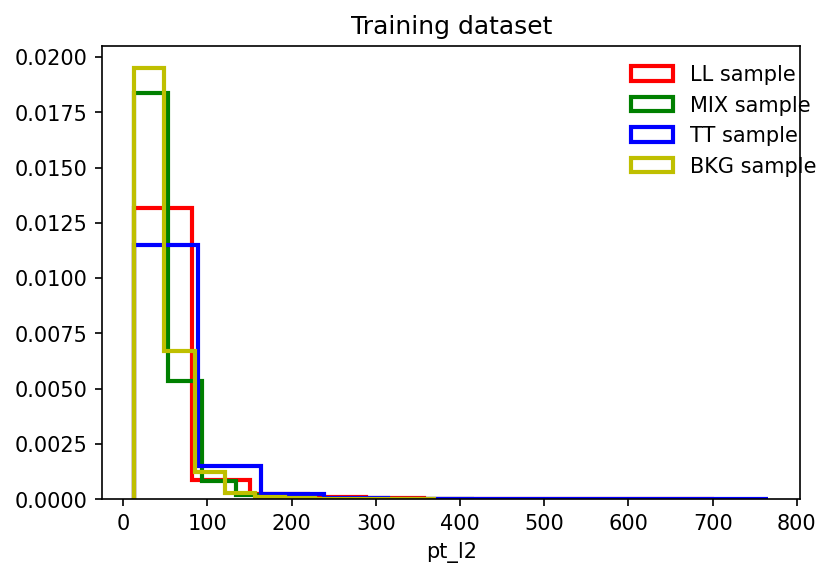

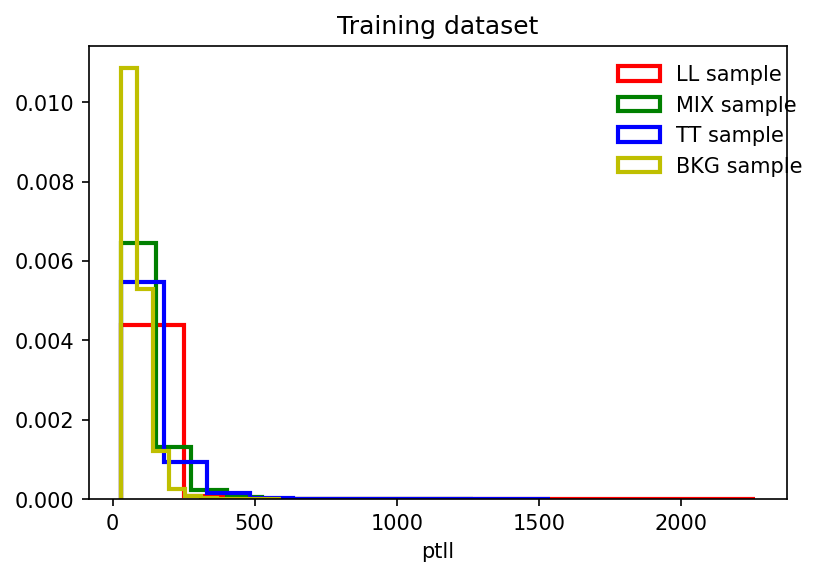

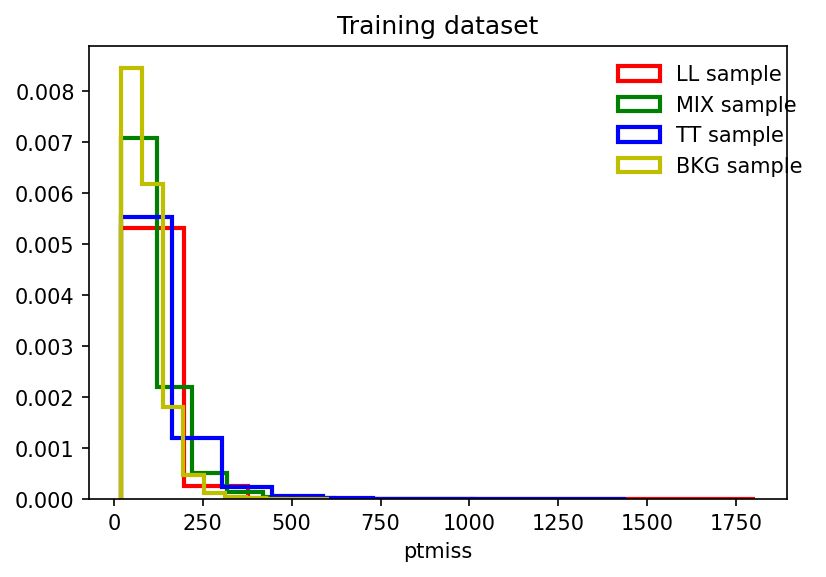

In [6]:
targets = ['LL', 'MIX', 'TT', 'BKG']
colors = ['r', 'g', 'b', 'y']
#targets = ['VBS', 'BKG']
#colors = ['r', 'b',]
axis = np.linspace(-2,2,20)
for ifeature, feature in enumerate(features):
    for target, mycolor in zip(targets, colors):
        plt.hist(df_train[ df_train['is' + target]==1].values[:,ifeature], label = target + ' sample', histtype='step', color=mycolor,  density=True, linewidth=2 )
    plt.title('Training dataset')
    plt.xlabel(feature)
    plt.legend(frameon=False, bbox_to_anchor=(1.05, 1.))
    #plt.yscale('log')
    plt.show()

In [6]:
dnn = SimpleNeuralNetwork(1200, learning_rate=0.0001, N_NODES=50, n_layers=8, n_features=X.shape[1])

# Save initial set of weights (before training) to re-initialize the ADNN in later steps.
# Useful if we want to restart always from the same starting point during the optimization studies.
dnn.save_weights("my_simpleDNN_model_polVBSvsTop")

2023-03-30 09:02:09.576042: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-30 09:02:09.585854: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-30 09:02:09.586147: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-30 09:02:09.587214: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [7]:
print(X.shape, Y.shape)

(127971, 21) (127971, 4)


100%|██████████| 1200/1200 [01:08<00:00, 17.41it/s]


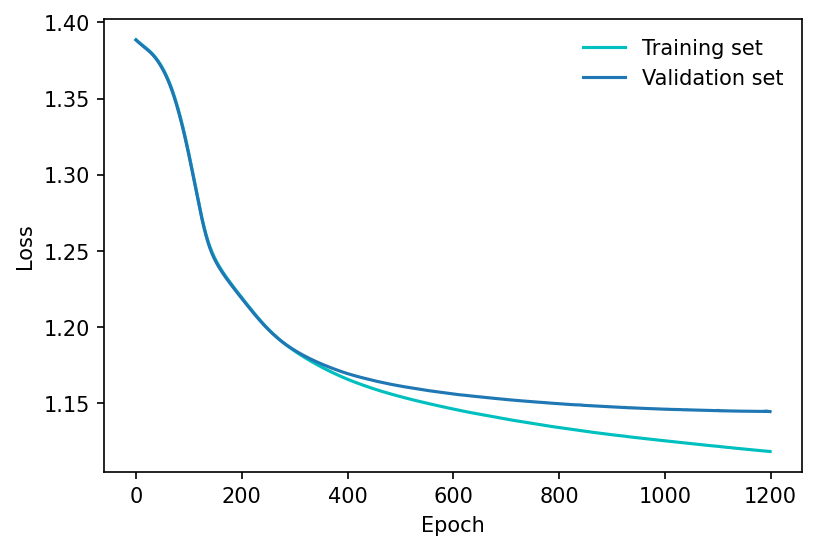

In [8]:
acc = dnn.fit (X.astype(np.float32), Y.astype(np.float32), X_val.astype(np.float32), Y_val.astype(np.float32))

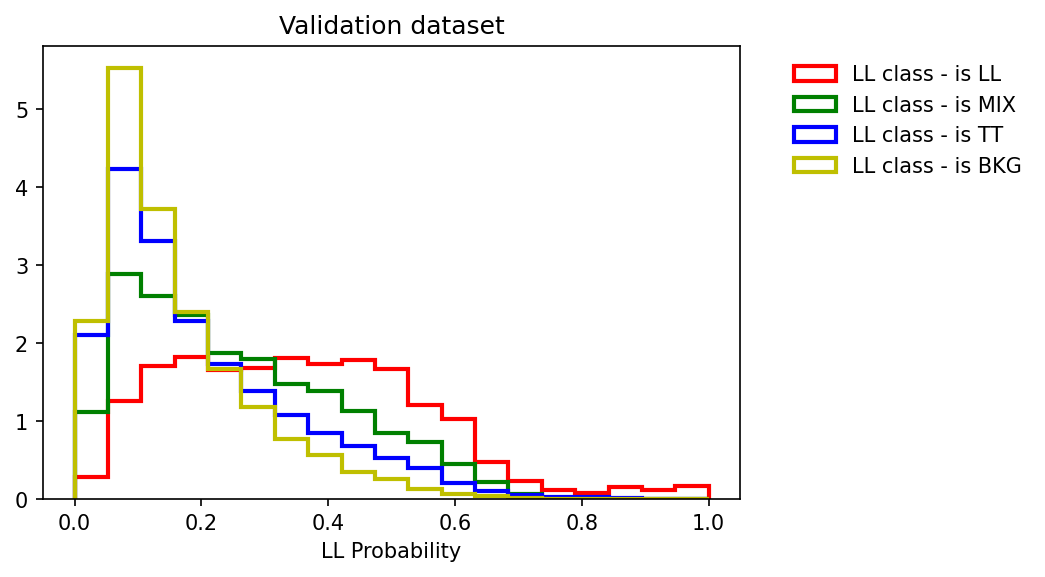

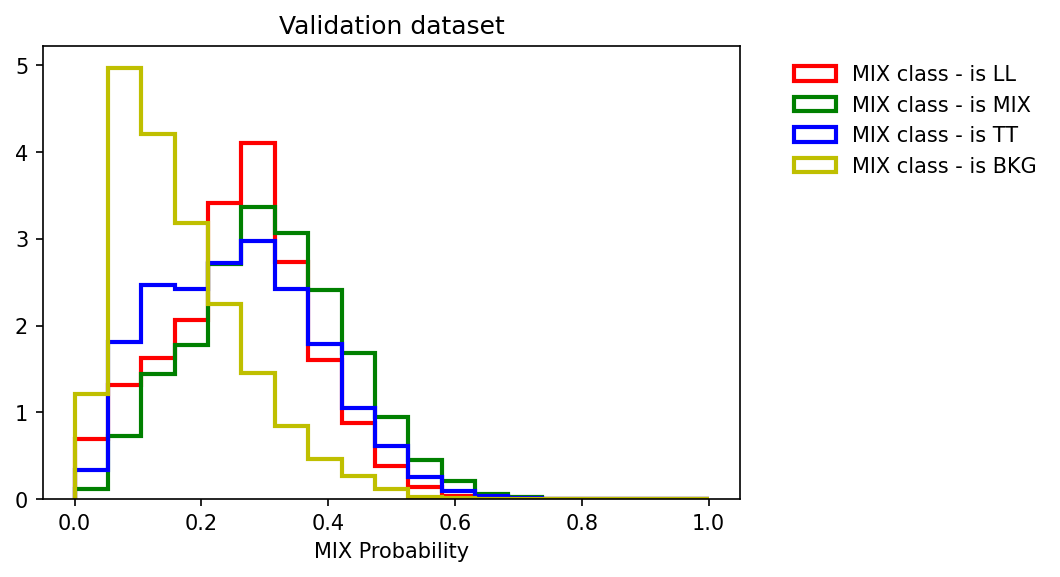

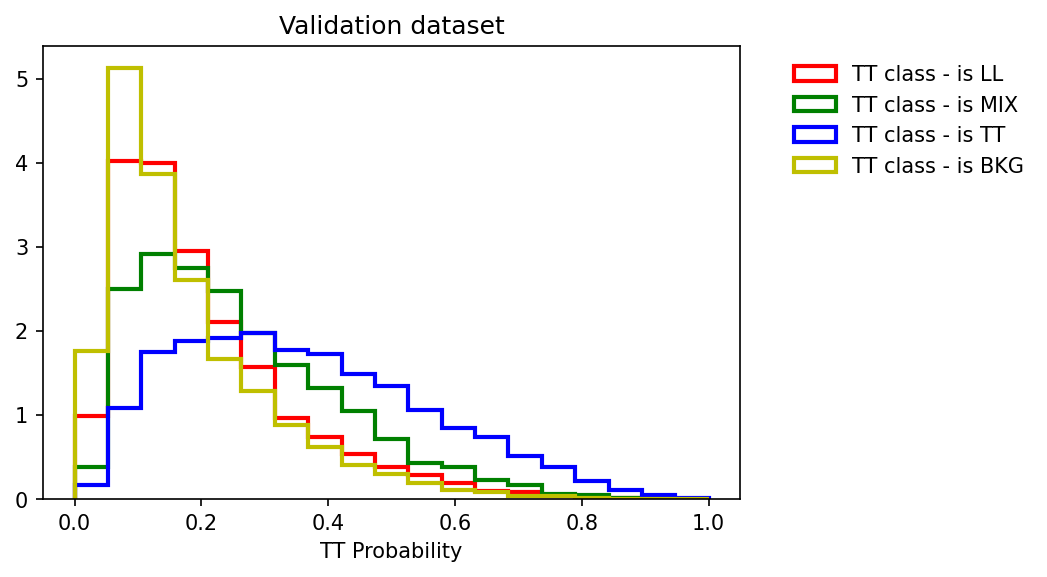

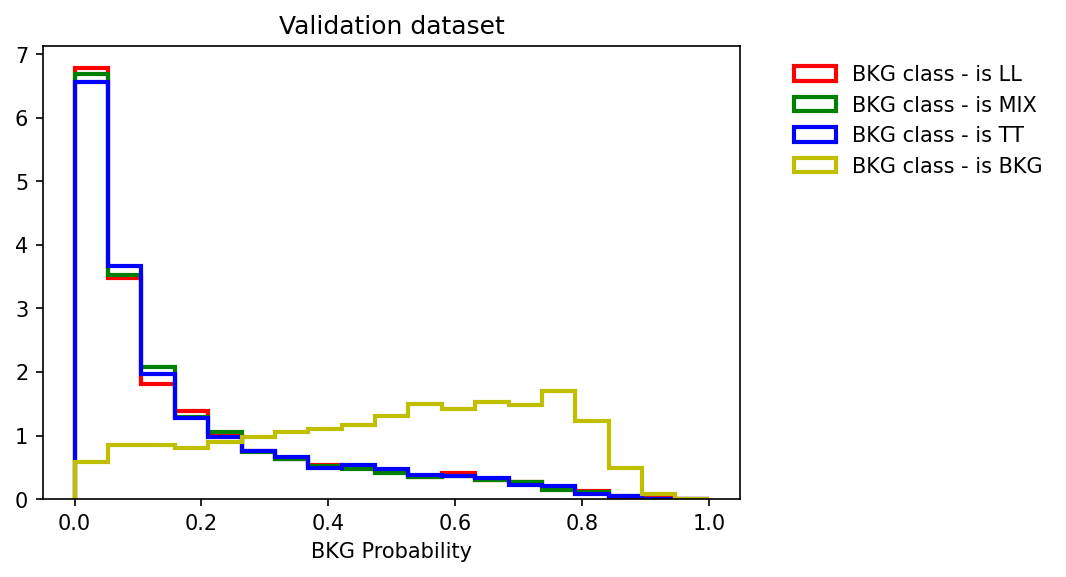

In [9]:
Y_predict_train = dnn.predict_proba(X)
Y_predict_val = dnn.predict_proba(X_val)

axis = np.linspace(0,1,20)

#targets = ['LL', 'MIX', 'TT', 'BKG']
predictions = targets
#colors = ['r', 'g', 'b', 'y']

Y_targets = {}
Y_predictions = {}

for target in targets:
    Y_targets[target] = dnn.predict_proba( df_val[ df_val['is' + target]==1 ].values[:,0:NDIM] )
    Y_predictions[target] = {}
    for iprediction, prediction in enumerate(predictions):
        Y_predictions[target][prediction] = Y_targets[target][:,iprediction]

for prediction in predictions:
    for target, mycolor in zip(targets, colors):
        plt.hist(Y_predictions[target][prediction].numpy(), bins = axis, label = prediction + ' class - is ' + target, histtype='step', color=mycolor,  density=True, linewidth=2 )
    plt.title('Validation dataset')
    plt.xlabel(prediction + ' Probability')
    plt.legend(frameon=False, bbox_to_anchor=(1.05, 1.))
    #plt.yscale('log')
    plt.show()

In [10]:
from sklearn.metrics import accuracy_score
from scipy.stats import ks_2samp, anderson_ksamp

X = df_val.values[:,0:NDIM]
Y_true = df_val.values[:,NDIM:NDIM+nclasses]
Y_pred = dnn.predict_proba(X)

# The classifier categorical accuracy is a good and simple metrics to evaluate the overall classification performance
Y_true_max = np.argmax(Y_true, axis=1)
Y_pred_max = np.argmax(Y_pred, axis=1)
print("Classifier categorical accuracy = ", accuracy_score(Y_true_max, Y_pred_max))

Classifier categorical accuracy =  0.4942302894211577


In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
#from matplotlib.backends.backend_pdf import PdfPages

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize = 16)
    plt.yticks(tick_marks, classes, fontsize = 16)

    thresh = cm.max() / 1.2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",fontsize=10)

    plt.xlabel("Predicted label", fontsize=16)
    plt.ylabel("True label", fontsize=16)

    
    plt.tight_layout()

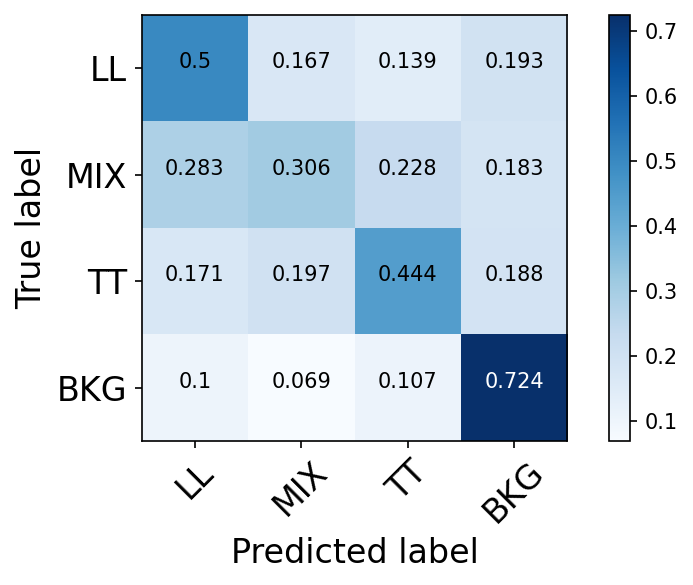

In [12]:
C = confusion_matrix(Y_true_max, Y_pred_max, normalize="true")
C = np.around(C, decimals=3)
#target_names = ['LL', 'MIX', 'TT','BKG']

plt.figure()
plot_confusion_matrix(C, classes=targets, title='')
plt.show(1) 

In [13]:
!pip install shap

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [14]:
val_df = pd.read_pickle('https://pandora.infn.it/public/a5e34a/dl/validation_dataset_pol_vbs_full2018v9_VBSvsTop.pkl')
pd.set_option('display.max_columns', None)
val_df = val_df.drop(columns=['costhetastarcmww_l1', 'costhetastarcmww_l2', 'nlep', 'njet'])
val_df.dropna(inplace=True)
val_df

,Rpt,Zepp_l1,Zepp_l2,Zepp_ll,detajj,eta_j1,eta_j2,eta_l1,eta_l2,mjj,mll,phi_j1,phi_j2,phi_l1,phi_l2,pt_j1,pt_j2,pt_l1,pt_l2,ptll,ptmiss,isVBS,isBKG
7611,1.123982,-1.655426,-2.024933,1.840179,3.659119,-0.475037,3.184082,-0.300903,-0.670410,319.691437,87.806656,-2.329590,0.894531,2.959961,-1.438477,63.764610,39.037178,52.946968,52.841656,62.189941,129.375549,0.0,1.0
3099,1.344753,0.281677,-0.139938,0.070869,3.303955,-1.627930,1.676025,0.305725,-0.115891,578.280396,251.024719,0.930298,-0.847900,1.675781,-2.013672,224.822220,53.611698,137.652222,117.749229,71.698227,188.141754,0.0,1.0
1321,0.617730,-0.993774,-2.220337,1.607056,2.629150,-1.408691,1.220459,-1.087891,-2.314453,331.687286,136.363892,2.977051,2.258789,-0.700806,0.728882,146.335205,60.122078,134.742935,40.334381,145.983643,110.932724,0.0,1.0
9226,0.103035,-3.581238,-2.430847,3.006042,3.671509,-0.515747,3.155762,-2.261230,-1.110840,1323.041992,90.848267,-0.269226,1.975586,-2.992188,-2.362793,395.999786,108.801369,97.181892,45.680241,136.778320,219.536774,0.0,1.0
7527,0.206176,0.750180,1.556302,1.153241,2.786017,-0.001580,-2.787598,-0.644409,0.161713,687.603149,77.451927,0.225708,-0.765381,-3.011719,-2.500000,260.379333,118.624901,186.825790,34.086582,217.188354,259.564362,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1326338,0.051864,-1.480469,-0.241943,0.861206,3.171875,-0.673340,2.498535,-0.567871,0.670654,773.112732,71.276382,-1.328125,1.554199,-0.103836,1.720947,264.331604,87.341209,44.467056,26.927368,45.833202,128.193787,0.0,1.0
960899,0.510381,0.676666,0.210358,0.443512,3.834167,-3.459961,0.374207,-0.866211,-1.332520,405.944580,80.840561,2.797852,-1.305420,0.037941,2.464355,89.813629,38.207962,62.978825,27.809700,45.772774,38.927917,0.0,1.0
1210477,0.187703,-0.113403,1.712463,0.799530,2.646851,-1.669922,0.976929,-0.459900,1.365967,449.387115,112.216309,1.113770,-2.491699,-0.543335,-1.567627,132.390076,95.075935,66.591904,35.479385,90.271896,27.980465,0.0,1.0
722570,0.591420,-0.144775,1.552856,0.704041,3.482666,1.022217,-2.460449,-0.863892,0.833740,409.480194,119.028069,1.707275,1.278564,-1.995117,-1.091797,90.245041,60.245525,82.431480,39.007744,110.893356,30.487631,0.0,1.0


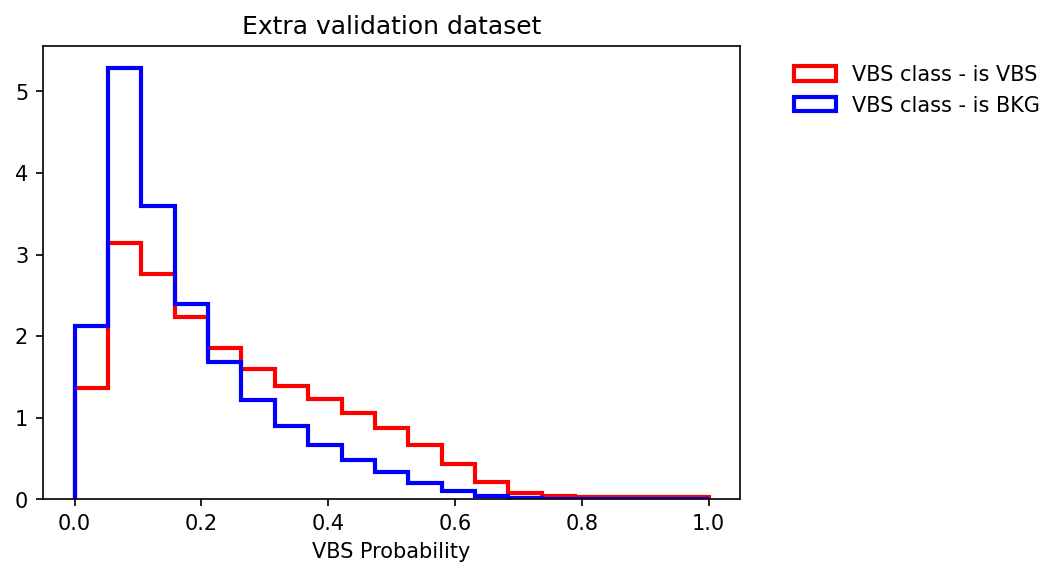

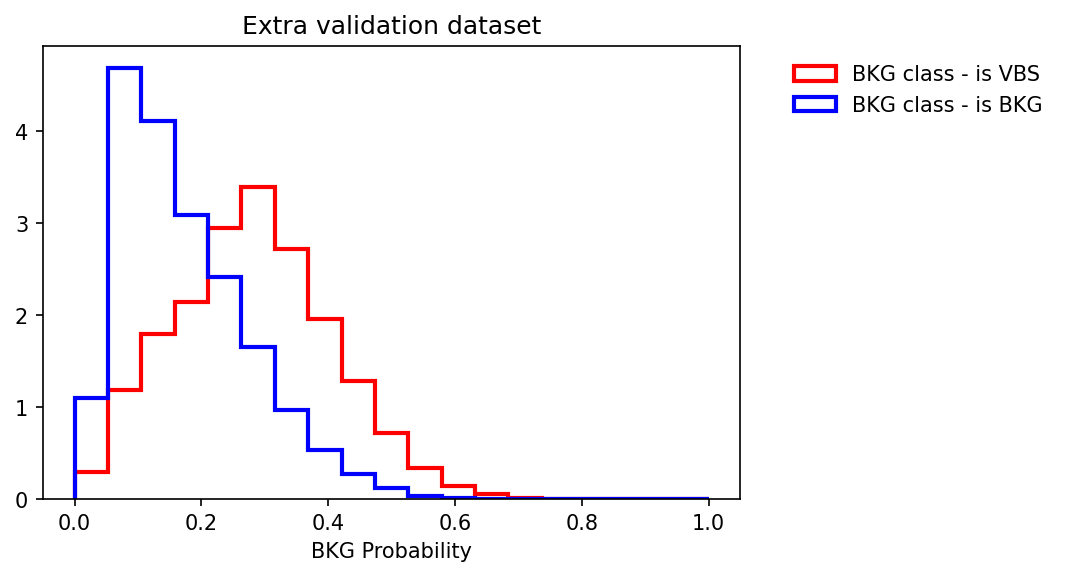

In [15]:
targets = ['VBS', 'BKG']
predictions = targets
colors = ['r', 'b']
Y_targets = {}
Y_predictions = {}

for target in targets:
    Y_targets[target] = dnn.predict_proba( val_df[ val_df['is' + target]==1 ].values[:,0:NDIM] )
    Y_predictions[target] = {}
    for iprediction, prediction in enumerate(predictions):
        Y_predictions[target][prediction] = Y_targets[target][:,iprediction]

for prediction in predictions:
    for target, mycolor in zip(targets, colors):
        plt.hist(Y_predictions[target][prediction].numpy(), bins = axis, label = prediction + ' class - is ' + target, histtype='step', color=mycolor,  density=True, linewidth=2 )
    plt.title('Extra validation dataset')
    plt.xlabel(prediction + ' Probability')
    plt.legend(frameon=False, bbox_to_anchor=(1.05, 1.))
        #plt.yscale('log')
    plt.show()

Classifier categorical accuracy =  0.1286462032333811


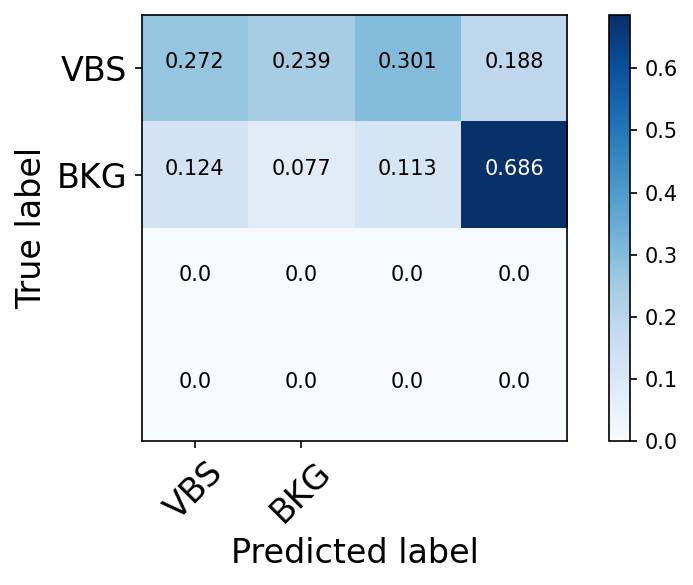

In [16]:
X = val_df.values[:,0:NDIM]
Y_true = val_df.values[:,NDIM:NDIM+nclasses]
Y_pred = dnn.predict_proba(X)

# The classifier categorical accuracy is a good and simple metrics to evaluate the overall classification performance
Y_true_max = np.argmax(Y_true, axis=1)
Y_pred_max = np.argmax(Y_pred, axis=1)
print("Classifier categorical accuracy = ", accuracy_score(Y_true_max, Y_pred_max))
C = confusion_matrix(Y_true_max, Y_pred_max, normalize="true")
C = np.around(C, decimals=3)
#target_names = ['LL', 'MIX', 'TT','BKG']

plt.figure()
plot_confusion_matrix(C, classes=targets, title='')
plt.show(1)

In [17]:
import shap
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
    
impact = plt.figure(3)
background = X[np.random.choice(X.shape[0], 500, replace=False)]
# explainer = shap.DeepExplainer((nn.model1.layers[0].input, nn.model1.layers[-1].output),background, session = tf.compat.v1.Session())
explainer = shap.KernelExplainer(dnn.predict_proba, background)
    
shap_values = explainer.shap_values(background)

Using 500 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/500 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

<Figure size 900x600 with 0 Axes>

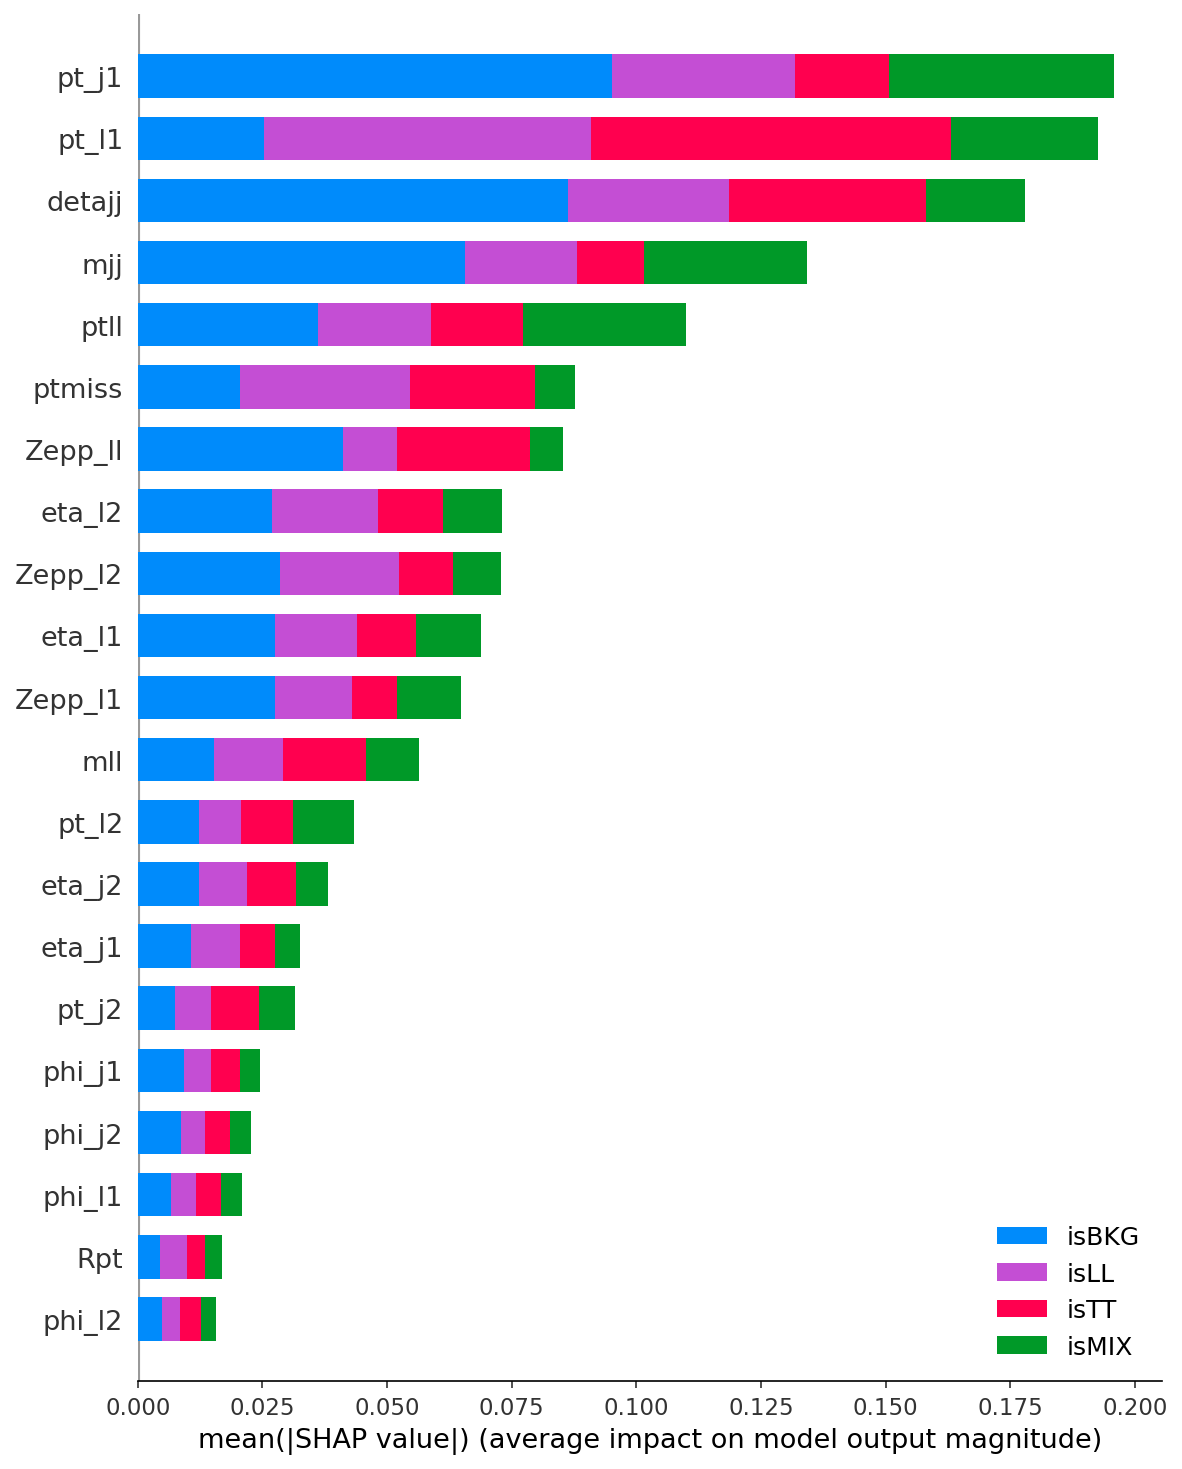

In [18]:
shap.summary_plot(shap_values, df_val[:len(df_val)-4].columns.values, plot_type="bar",class_names=['isLL', 'isMIX', 'isTT', 'isBKG'], max_display =100)
impact.savefig('VBS_pol_CMWW_simpleDNN_shap_values.pdf')
impact.show(3)